In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import camera_cal_helper as cal
import binary_image_helper as binar
import lane_polynomial_helper as lane
%matplotlib inline

In [2]:
x_offlow=450
x_offhigh=75

In [88]:
image=cv2.imread('output_images/test5_undistorted.jpg')
binary_top=cv2.imread('output_images/test5_transformed.jpg', cv2.IMREAD_GRAYSCALE)

In [89]:
# Number of sliding windows
nwindows = 7
# Width of the windows +/- margin
margin = 75
# Minimum number of pixels found to recenter window
minpix = 50
# Meters per pixel in x and y direction
ym_per_pix = 30/720
xm_per_pix = 3.7/700

In [90]:
leftx, lefty, rightx, righty, out_img = lane.find_lane_pixels(binary_top, nwindows, margin, minpix)
left_coeff, right_coeff, left_fitx, right_fitx, ploty = lane.fit_polynomial(binary_top.shape, leftx, lefty, rightx, righty)

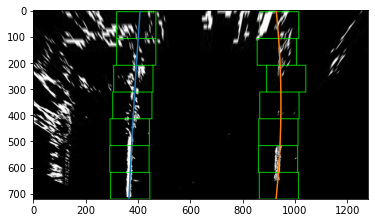

In [91]:
plt.imshow(out_img)
plt.plot(left_fitx, ploty)
plt.plot(right_fitx, ploty)

In [92]:
left_curverad, right_curverad, dist_center= lane.lane_car_parameters(image.shape, left_coeff, right_coeff, left_fitx, right_fitx, ploty, xm_per_pix, ym_per_pix)
print('Rleft: {} m'.format(int(left_curverad)))
print('Rrght: {} m'.format(int(right_curverad)))

Rleft: 9401 m
Rrght: 1163 m


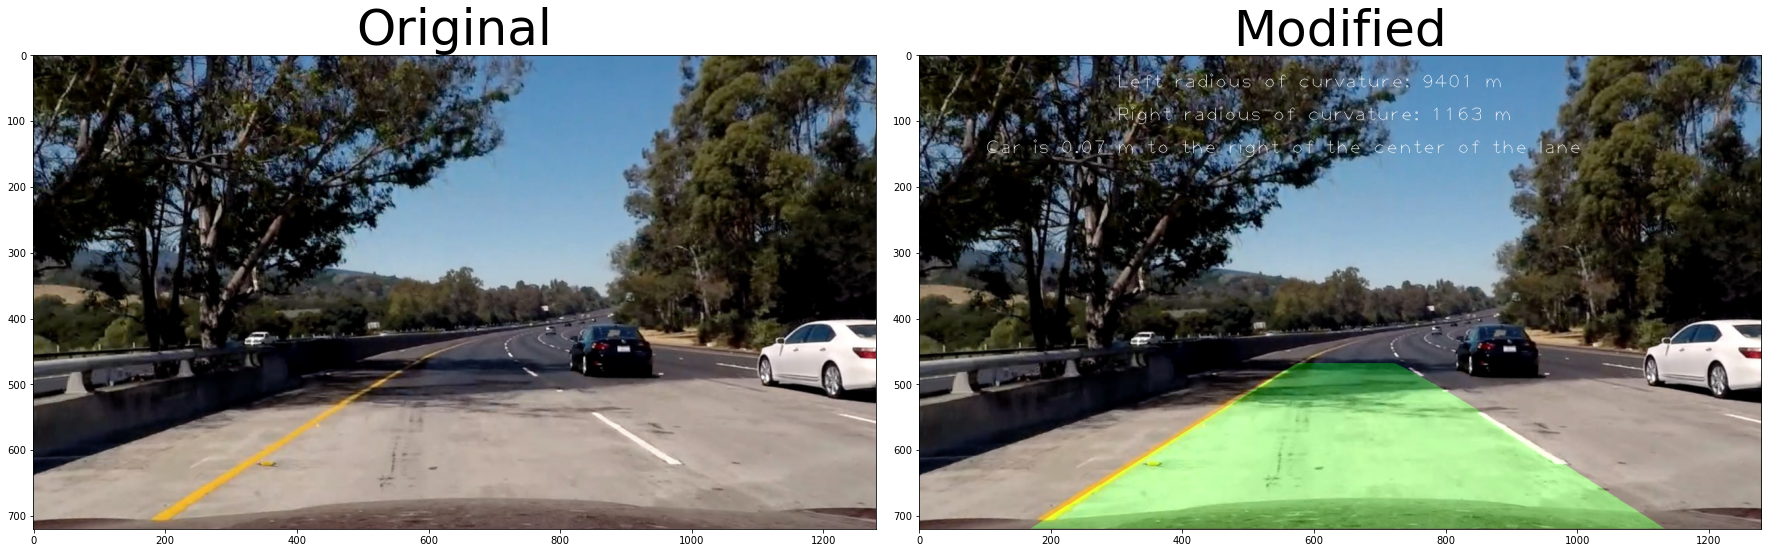

In [93]:
result_image = lane.lanes_image(image, left_fitx, right_fitx, ploty, x_offlow, x_offhigh)
lane.add_lane_par(result_image, left_curverad, right_curverad, dist_center)
cal.compare_images(image, result_image, 0, None, 'BGR', 'BGR')

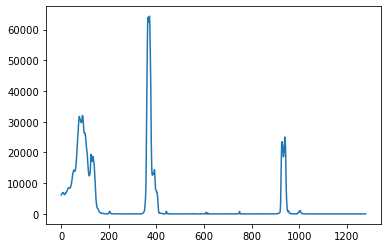

In [94]:
sum_pix = np.sum(binary_top[binary_top.shape[0]//2:,:], axis=0)
plt.plot(sum_pix)